In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import ascii
import os
import scipy.stats
import numpy as np
from astropy import units as u
from astropy import constants as c
import sys


In [2]:
homedir = os.getenv("HOME")
gitdir = homedir+'/github/Virgo/'

In [3]:
sys.path.append(homedir+'/github/Virgo/programs')
from virgoCommon import *

Running on Rose's computer


# Read in Kennicutt Halpha Filters #

Rob has a Halphalow and Halphahigh filters.  Got transmission curves from 

http://mogit.as.arizona.edu/90prime_files/Documents/filters/90Prime_filter_tracings/Halpha%20filters.txt

File has transmission for zero deg angle of incidence and 10 deg incidence.


Saved files in ~/github/Virgo/observing/

In [5]:
filepath = gitdir+'observing/'
halow_zero = filepath+'halphalow-zerodeg.txt'
halow_ten = filepath+'halphalow-tendeg.txt'
hahigh_zero = filepath+'halphahigh-zerodeg.txt'
hahigh_ten = filepath+'halphahigh-tendeg.txt'

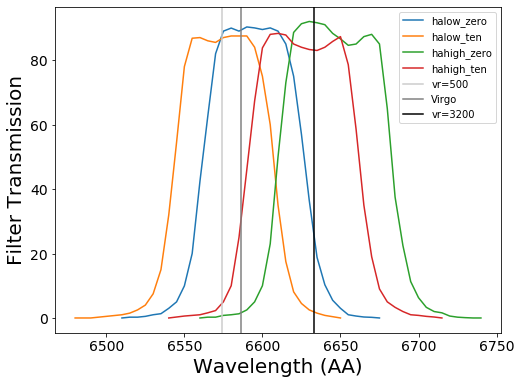

In [64]:
filters = [halow_zero,halow_ten,hahigh_zero,hahigh_ten]
filter_names = ['halow_zero','halow_ten','hahigh_zero','hahigh_ten']
plt.figure(figsize=(8,6))
for i in range(len(filters)):
    d = ascii.read(filters[i])
    plt.plot(d['col1'],d['col2'],label=filter_names[i])


# add virgo
# recession velocity ~ VC = 1050+/-35km s^-1^ from 
#  Binggeli, B.; Popescu, C. C.; Tammann, G. A.
# https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..275B/abstract
# 
# assume a velocity disp of 1000 km/s

lambda_0 = 6563. # angstrom
vcenter = 1050#*u.km/u.s
width = 1000#*u.km/u.s
zcenter = vcenter/3.e5
lambda_obs_center = lambda_0*(1+zcenter)

vmin = vcenter - 0.5*width
zmin = vmin/3.e5
lambda_obs_min = lambda_0*(1+zmin)

vmax = vcenter + 0.5*width
zmax = vmax/3.e5
lambda_obs_max = lambda_0*(1+zmax)

mean = lambda_obs_center 
std = lambda_obs_max - lambda_obs_min


plt.axvline(x=lambda_0*(500./3.e5+1),label='vr=500',color='.8')
plt.axvline(x=lambda_obs_center,ls='-',color='0.5',label='Virgo')
plt.axvline(x=lambda_0*(3200./3.e5+1),label='vr=3200',color='k')
#plt.axvline(x=lambda_obs_min,ls='--',color='k')
#plt.axvline(x=lambda_obs_max,ls='--',color='k')

plt.legend()
plt.xlabel('Wavelength (AA)',fontsize=20)
plt.ylabel('Filter Transmission',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#x_min = 6500
#x_max = 6750
##plt.figure()
#x = np.linspace(x_min, x_max, 100)
#y = scipy.stats.norm.pdf(x,mean,std)
#plt.plot(x,4000*y,'k-',label='Virgo cluster')

plt.savefig('kennicutt_halpha.pdf')

# 2021 Observing Runs

* the info above is from 2020 - never observed

* we need to figure out filter and targets 

In [4]:
plotdir = '/home/rfinn/research/Virgo/plots/'
os.chdir(plotdir)

In [5]:
%run ~/github/Virgo/programs/readtables.py

number of CO with Halpha =  145
number of CO without Halpha =  97


Text(0.5, 1.0, 'Filamentary Structures Surrounding the Virgo Cluster')

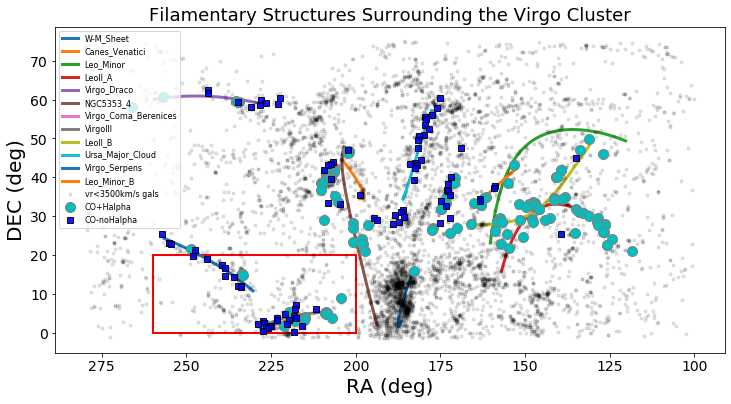

In [17]:
plt.figure(figsize=(12,6))
plot_spines()
plt.plot(v.main['RA'],v.main['DEC'],'k.',alpha=.1,label='vr<3500km/s gals')
# plot CO sources
flag = v.main['COflag'] & v.main['HAobsflag']
print('number of CO with Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'co',markersize=10,alpha=1,label='CO+Halpha',mec='0.5')
flag = v.main['COflag'] & ~v.main['HAobsflag']
print('number of CO without Halpha = ',sum(flag))
plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'bs',alpha=.9,mec='k',markersize=6,label='CO-noHalpha')


# add a rectangle for Blanco DD time, spring 2021
rect = Rectangle([200,0], 60, 20, fc="none",ec='r',lw=2,label='DECcam targets')
plt.gca().add_artist(rect)

# add a rectangle for Blanco DD time, spring 2021
#rect = Rectangle([178,-1], 20, 20, fc="none",ec='b',lw=2,label='Virgo Cluster')
#plt.gca().add_artist(rect)

#plt.axis([195,265,-2,30])
# continue with plot
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left',fontsize=8)
plt.title('Filamentary Structures Surrounding the Virgo Cluster',fontsize=18)

# TODO for March 12-15 and April 13-17 90prime Runs

* email Dick Joyce, Melanie, Dara, Dennis about borrowing Halpha+4nm filter for 90prime
  - confirm that filter is available and exchange between kpno and steward is feasible
  
* airmass plots for general regions

* footprint of 90prime?
  - 1.16 x 1.16 deg 
  - 1.1 x 1.1 deg with mosaic filters (5.75 in, vs 6 in required for full FOV)

* finding charts for 97 remaining CO sources
  - github/Virgo/programs/kpno-halpha.p3.py
  
* Blanco+DECcam time at end of March 24-26

In [18]:
5.75/6*1.16

1.1116666666666666

# Finding Charts

In [6]:
%run ~/github/Virgo/programs/observing-halpha.py

/home/rfinn/github/Virgo/programs/observing-halpha.py:249: RuntimeWarning: divide by zero encountered in log10
  pointing_mag = 22.5 - 2.5 * np.log10(v.nsav0['NMGY'][:,4][obs_mass_flag])


nsa id not found in list of pointings
nsa id not found in list of pointings


In [109]:
len(pointing_ra)

97

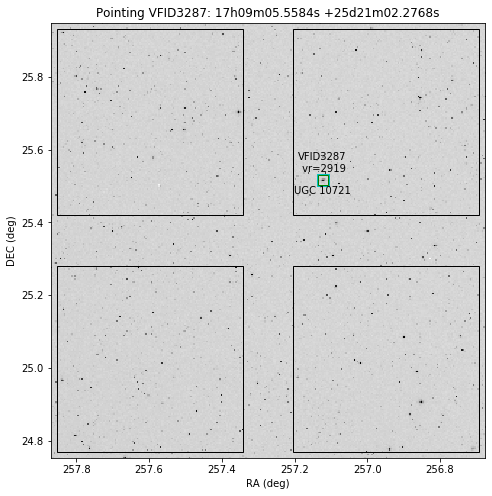

In [7]:
platinum_finding_chart(0,BOK=True)
#plot_BOK_footprint(pointing_ra[0],pointing_dec[0])

In [93]:
pscale = .45
xdim_pix = 4096
# gap is 500", approximate 1060 pixels
gap = 500./3600
detector_dra = xdim_pix*pscale/3600. # 2154 pixels * 0.33"/pix, /3600 to get deg
detector_ddec = xdim_pix*pscale/3600. # 2154 pixels * 0.33"/pix, /3600 to get deg
offset_width = detector_dra+gap/2
detector_offsets = [(-1*offset_width,gap/2),\
                        (-1*offset_width,-1*offset_width),\
                        (gap/2,gap/2),\
                        (gap/2,-1*gap/2)]

In [94]:
for d in detector_offsets:
    a,b = d
    print(a,b)

-0.5814444444444444 0.06944444444444445
-0.5814444444444444 -0.5814444444444444
0.06944444444444445 0.06944444444444445
0.06944444444444445 -0.06944444444444445


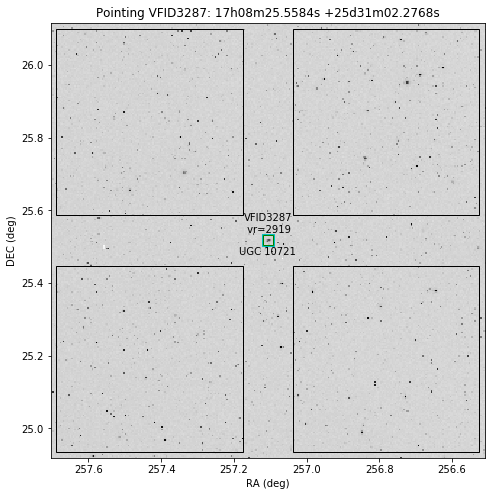

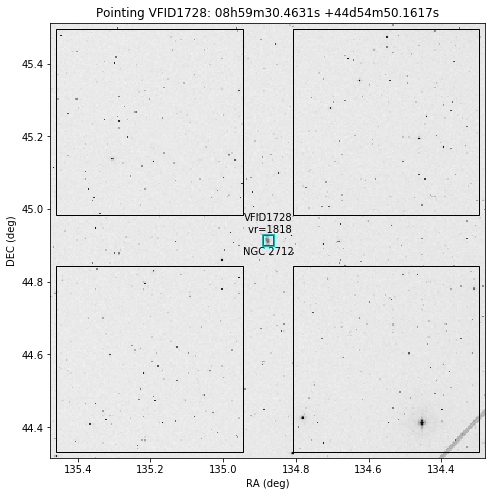

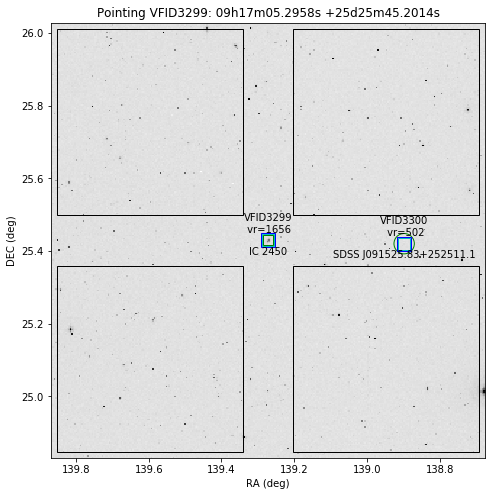

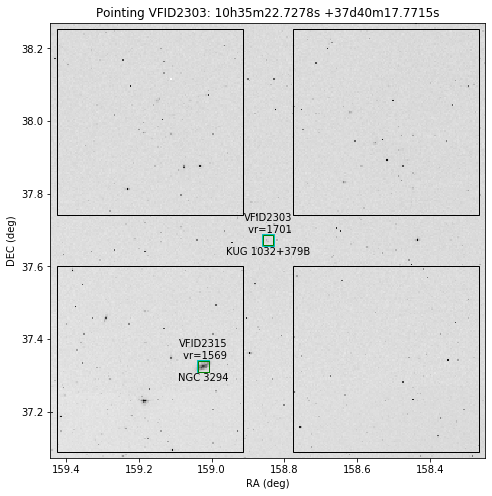

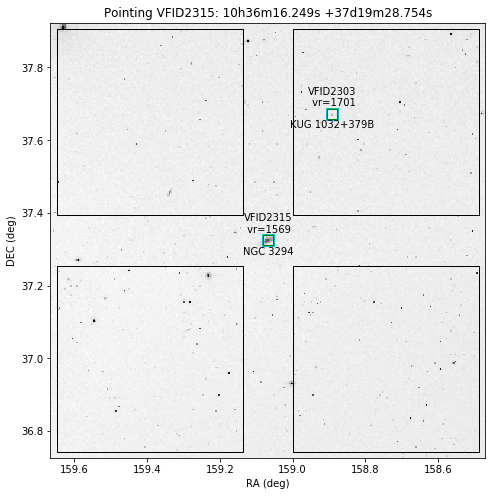

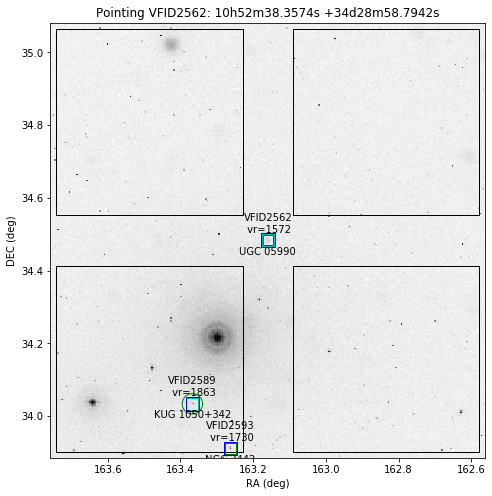

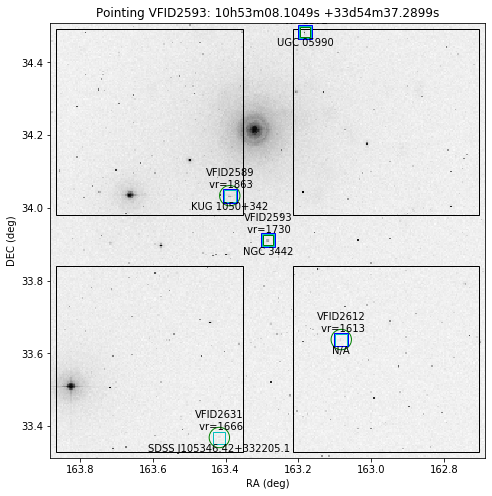

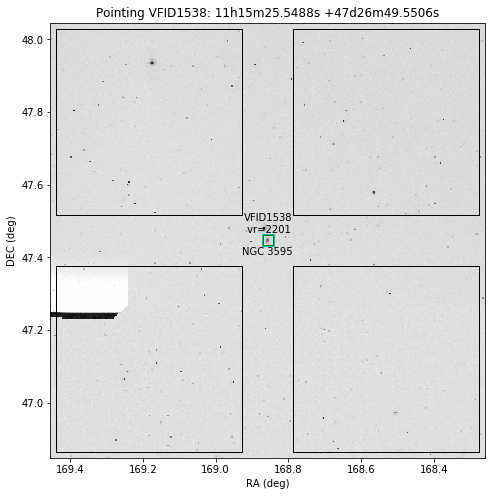

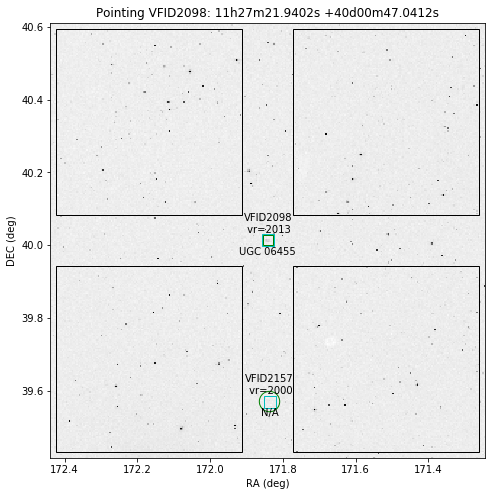

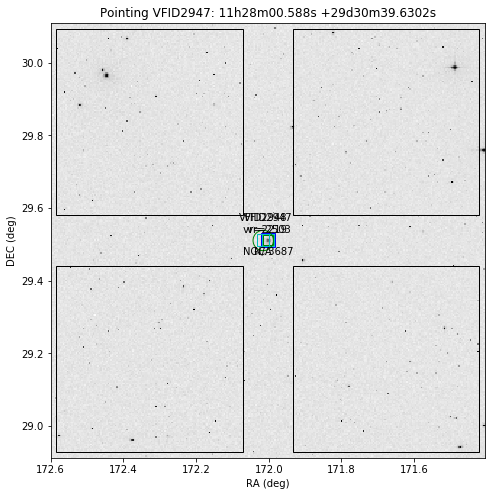

In [114]:
for i in range(10):
    platinum_finding_chart(i,BOK=True)

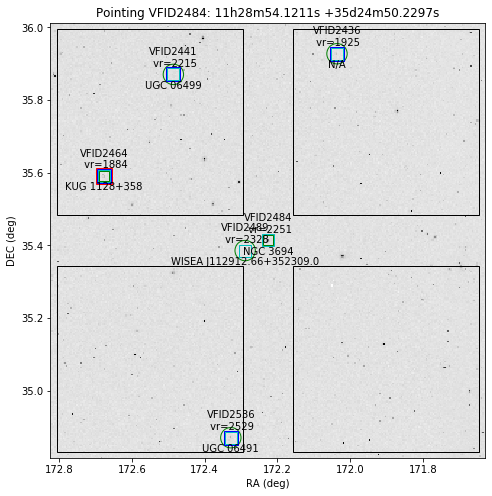

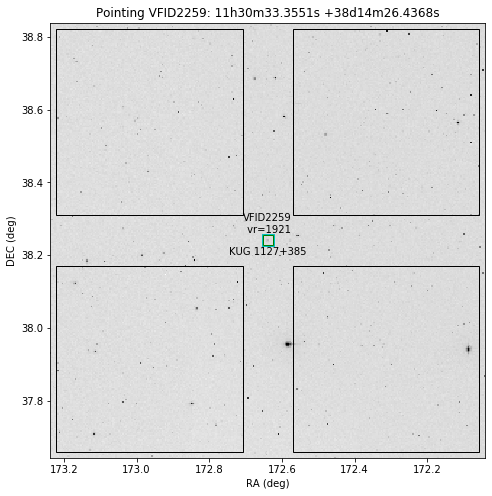

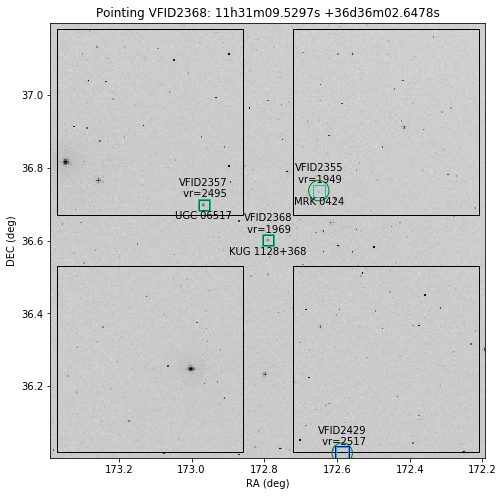

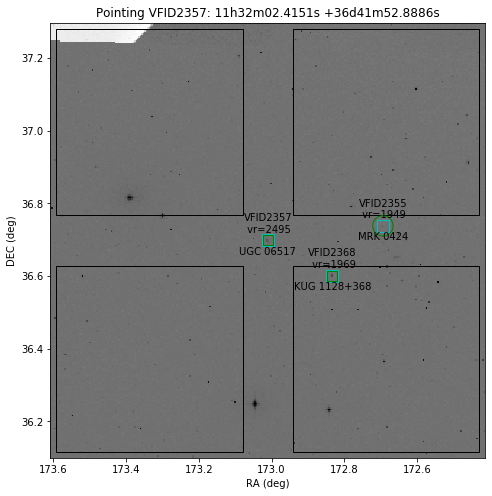

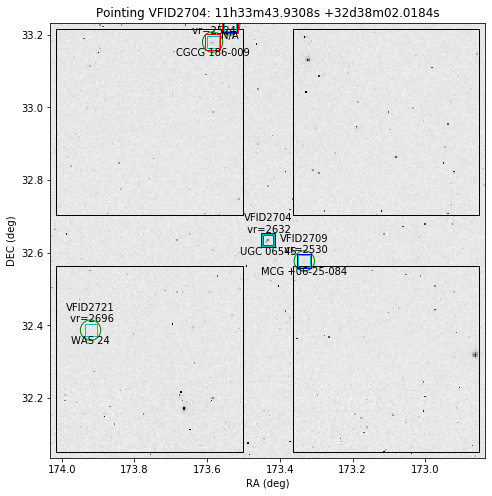

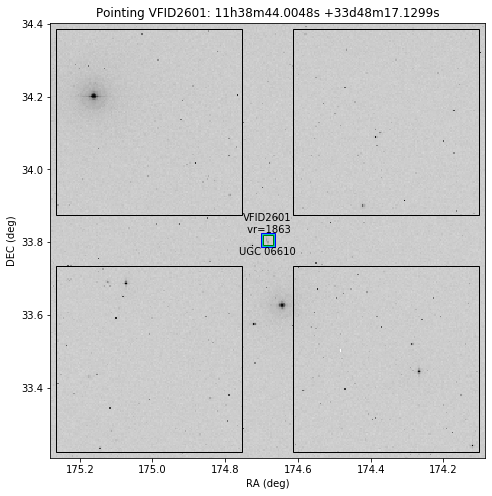

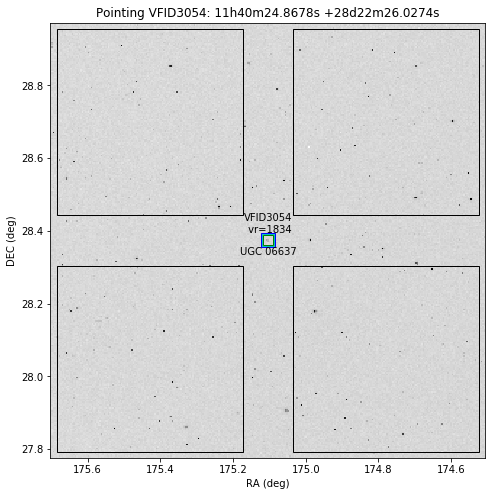

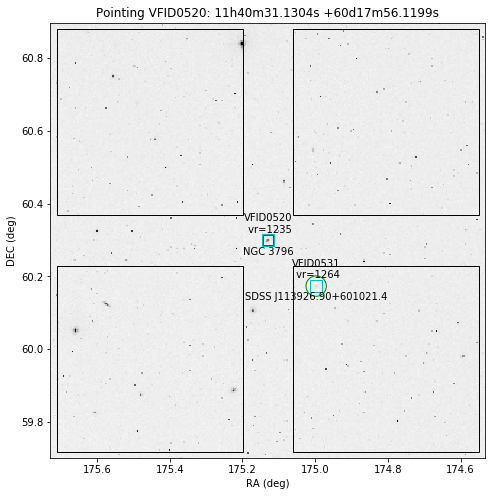

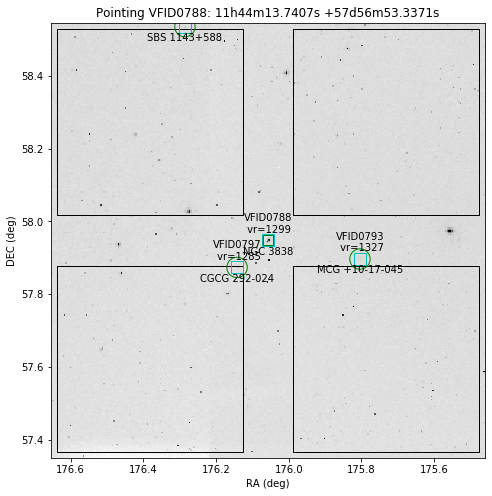

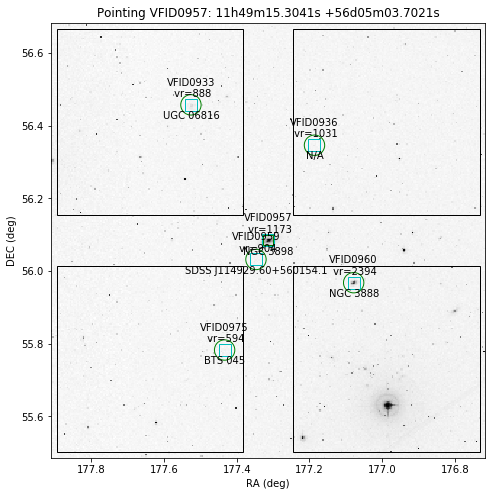

In [115]:
for i in range(10,20):
    platinum_finding_chart(i,BOK=True)

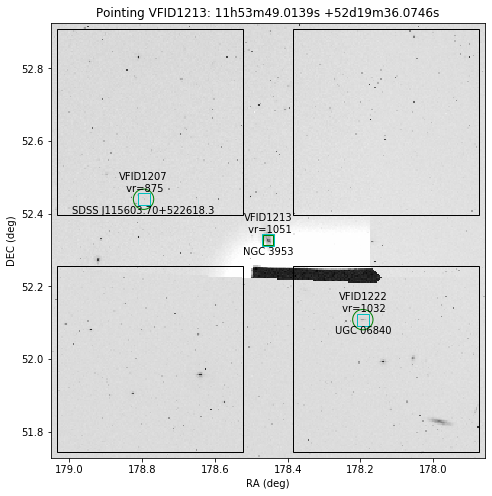

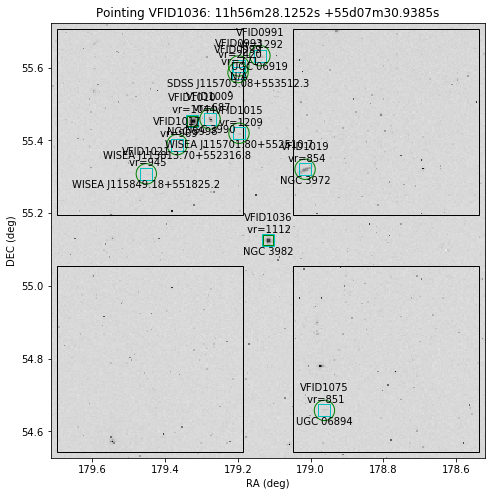

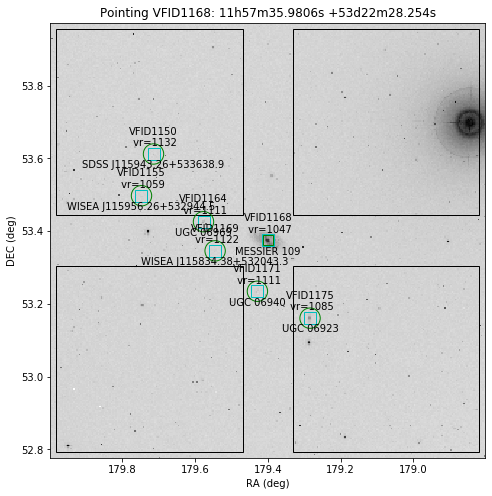

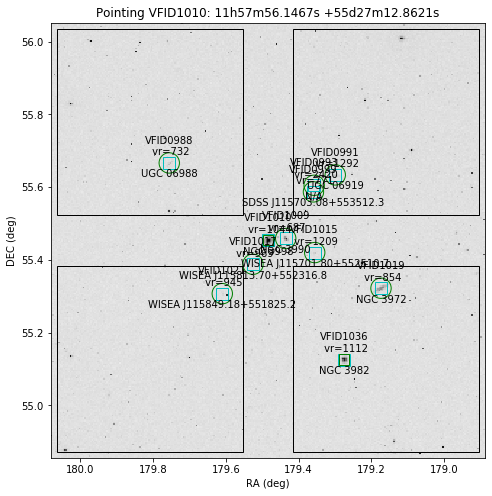

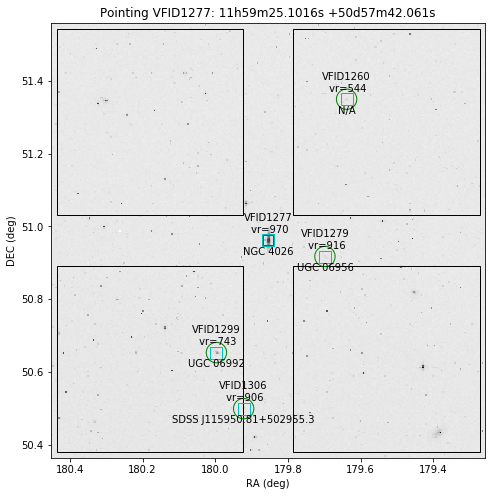

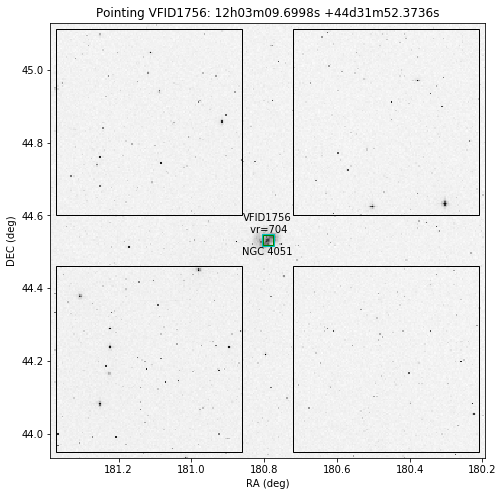

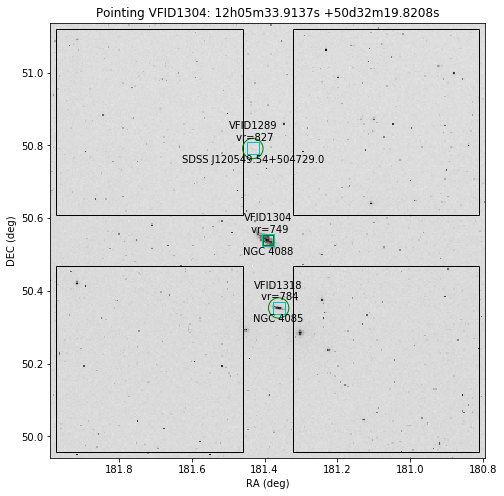

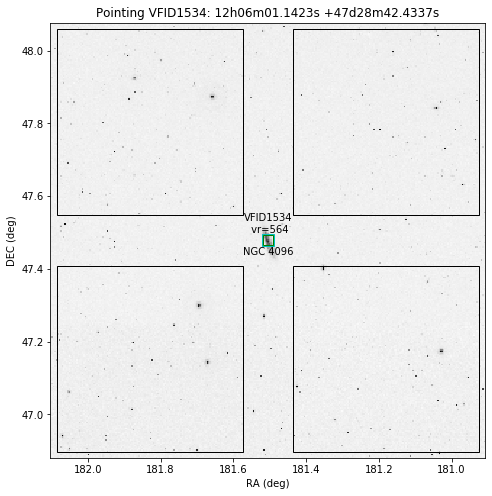

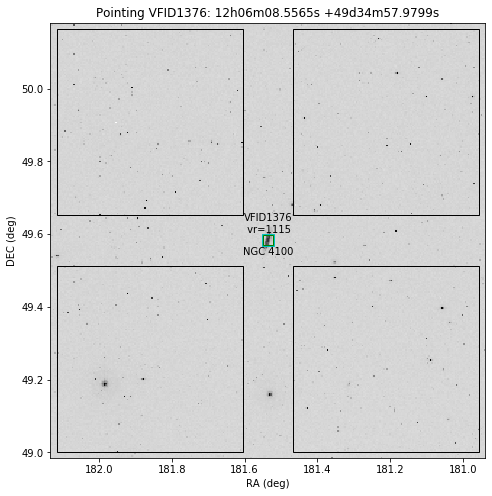

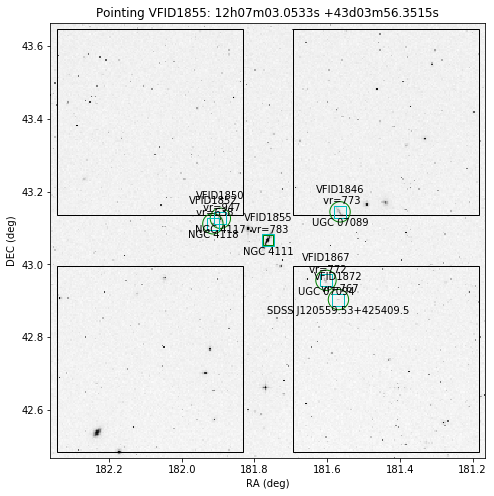

In [116]:
for i in range(20,30):
    platinum_finding_chart(i,BOK=True)

In [117]:
!ls

CO-sources.png			 NGCgroup.png
halpha-pointings.png		 positions-CO.jpg
HIdef-filaments.pdf		 positions-CO.pdf
HIdef-filaments.png		 test_table.fits
HIdef_morphology_fullsample.png  VFID0566-NGC5989
NGCfilament-GLcomparison.png	 vf_ngcfilament.png
NGCfilament.png


# Things to check

* are r and Halpha expected to have the same focus?  If not, what is the typical offset between the two?
  * will need to focus in each filter and measure the offset
  
* finding charts 
* dither script for each object and filter
* airmass plots

* observing plan for each night